**1. Initialization**

In [2]:

import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
from itertools import cycle
import seaborn as sns


folder = os.path.join("/", "Data", "CREMEv2_Result", "20230310", "logs_working", "toTrain")
train_technique = ["label_accounting_train_technique.csv",
                   "relabel_syslog_train_technique.csv",
                   "label_traffic_train_technique.csv"]
train_lifecycle = ["label_accounting_train_lifecycle.csv",
                   "relabel_syslog_train_lifecycle.csv",
                   "label_traffic_train_lifecycle.csv"]
datas = ["accounting", "syslog", "traffic"]


labels = {
    0 : "Benign",
    1 : "T1595.001",
    2 : "T1190",
    3 : "T1059.004",
    4 : "T1203",
    5 : "T1133",
    6 : "T1554",
    7 : "T1543",
    8 : "T1068",
    9 : "T1622",
    10 : "T1078.003",
    11 : "T1046",
    12 : "T1105",
    13 : "T1498.001",
    14 : "T1458",
    15 : "T1486",
    16 : "T1496",
    17 : "T1499"
}

labels_lifecycle = {
    0 : "Benign",
    1 : "Mirai",
    2 : "Disk Wipe",
    3 : "Ransomware",
    4 : "Resource Hijacking",
    5 : "End Point DoS"
    
}


In [3]:
traffic_technique = pd.read_csv(os.path.join(folder, train_technique[2]))
accounting_technique = pd.read_csv(os.path.join(folder, train_technique[0]))
syslog_technique = pd.read_csv(os.path.join(folder, train_technique[1]))

traffic_lifecycle = pd.read_csv(os.path.join(folder, train_lifecycle[2]))
accounting_lifecycle = pd.read_csv(os.path.join(folder, train_lifecycle[0]))
syslog_lifecycle = pd.read_csv(os.path.join(folder, train_lifecycle[1]))

In [4]:
traffic_technique_count = traffic_technique['Label'].value_counts().sort_index()
accounting_technique_count = accounting_technique['Label'].value_counts().sort_index()
syslog_technique_count = syslog_technique['Label'].value_counts().sort_index()

traffic_lifecycle_count = traffic_lifecycle['Label_lifecycle'].value_counts().sort_index()
accounting_lifecycle_count = accounting_lifecycle['Label_lifecycle'].value_counts().sort_index()
syslog_lifecycle_count = syslog_lifecycle['Label_lifecycle'].value_counts().sort_index()

In [19]:
technique_combined_count = pd.DataFrame({
    'accounting': accounting_technique_count,
    'syslog': syslog_technique_count,
    'traffic': traffic_technique_count
}).fillna(0)

In [20]:
lifecycle_combined_count = pd.DataFrame({
    'accounting': accounting_lifecycle_count,
    'syslog': syslog_lifecycle_count,
    'traffic': traffic_lifecycle_count   
    }).fillna(0)

In [7]:
from matplotlib.ticker import FuncFormatter
def custom_formatter(data, pos):
    return f'{int(data)}'

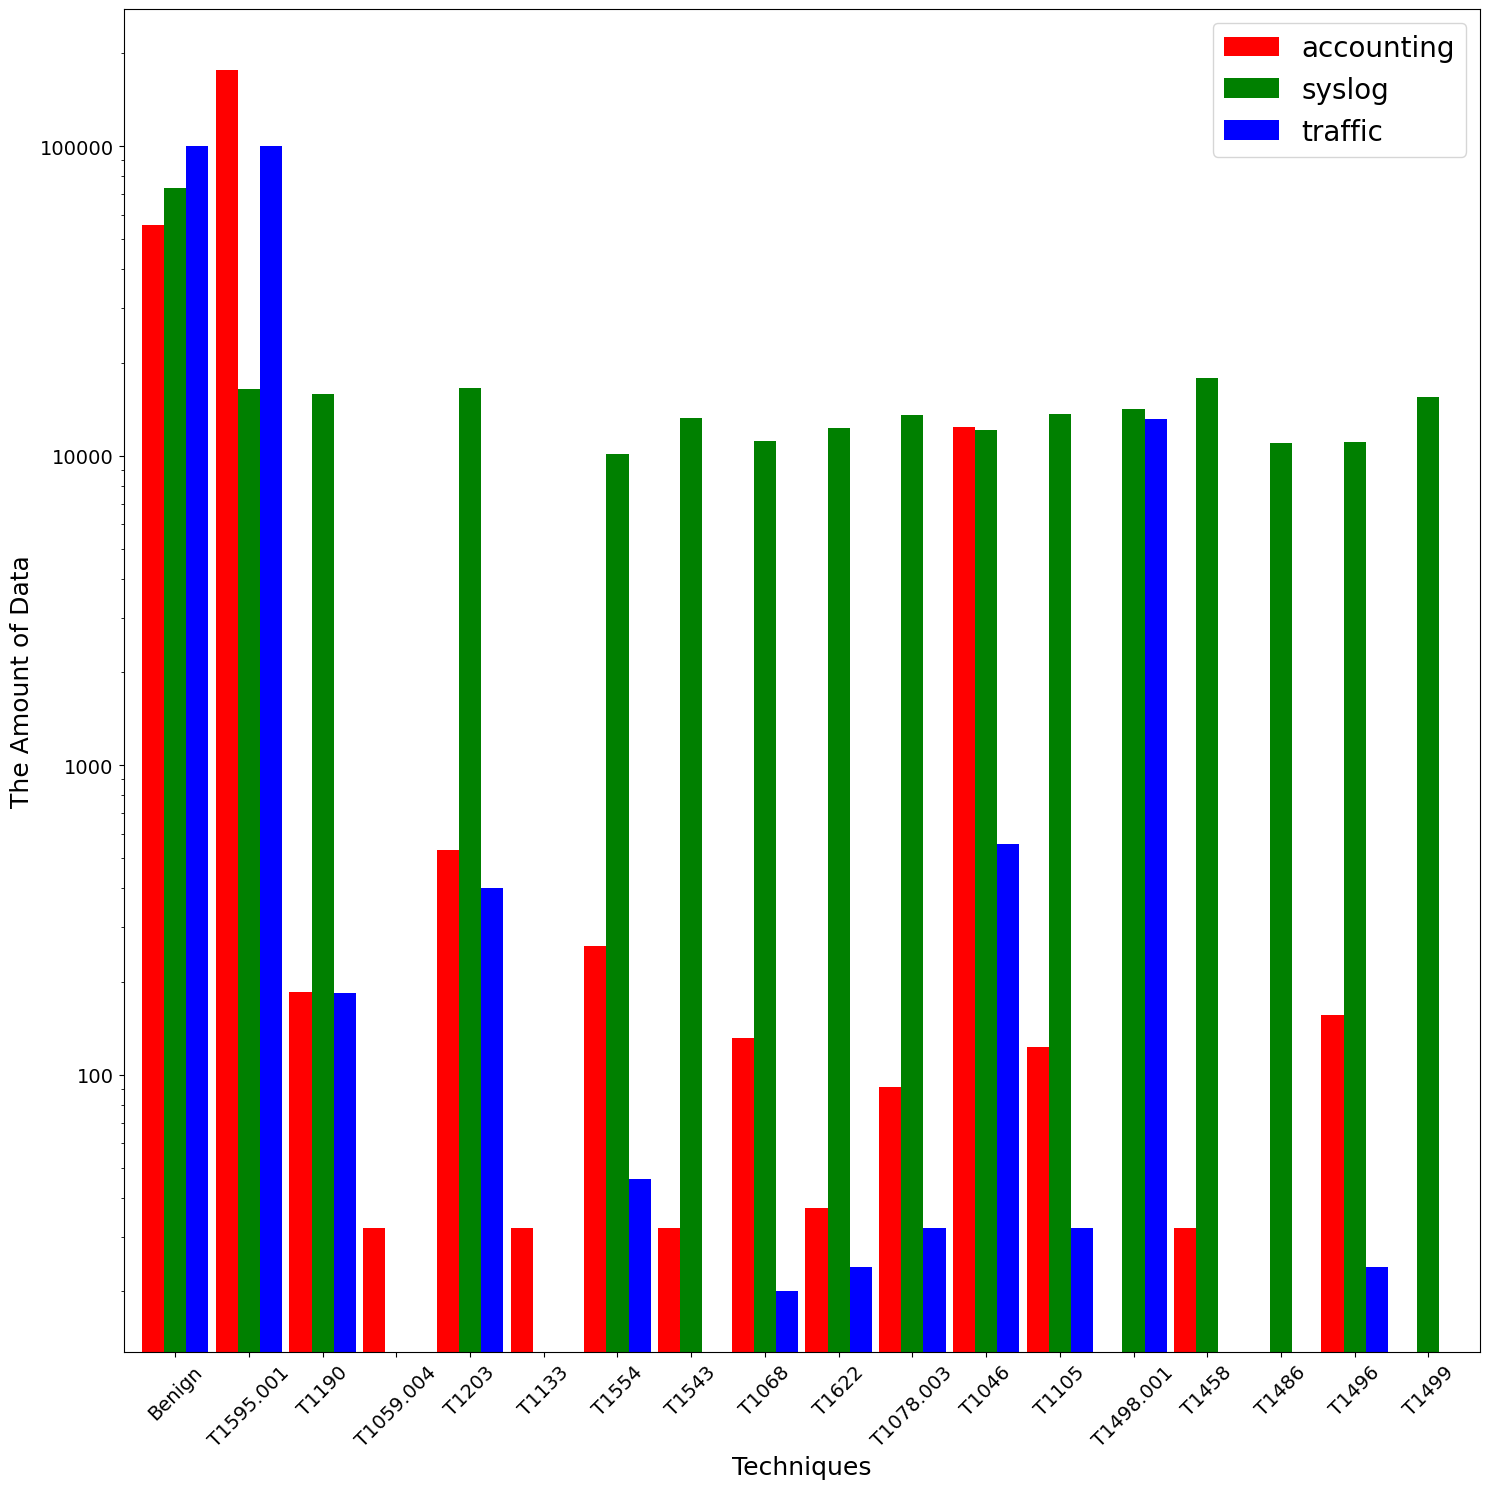

In [34]:
colors = ['red', 'green', 'blue']

axt = technique_combined_count.plot(kind='bar', figsize=(15, 15), logy=True, color=colors, width=0.9)
# plt.title('Number of Data Points by Class Across Datasets')
plt.ylabel('The Amount of Data', fontsize=18)
plt.xlabel('Techniques', fontsize=18)
# plt.xticks(rotation=0)
plt.legend(fontsize=20)
current_labels = [item.get_text() for item in axt.get_xticklabels()]
new_labels = [labels.get(int(label), label) for label in current_labels]

axt.set_xticklabels(new_labels, fontsize=14, rotation=45)
axt.yaxis.set_major_formatter(FuncFormatter(custom_formatter))
axt.tick_params(axis='y', labelsize=14)

plt.tight_layout()
plt.show()

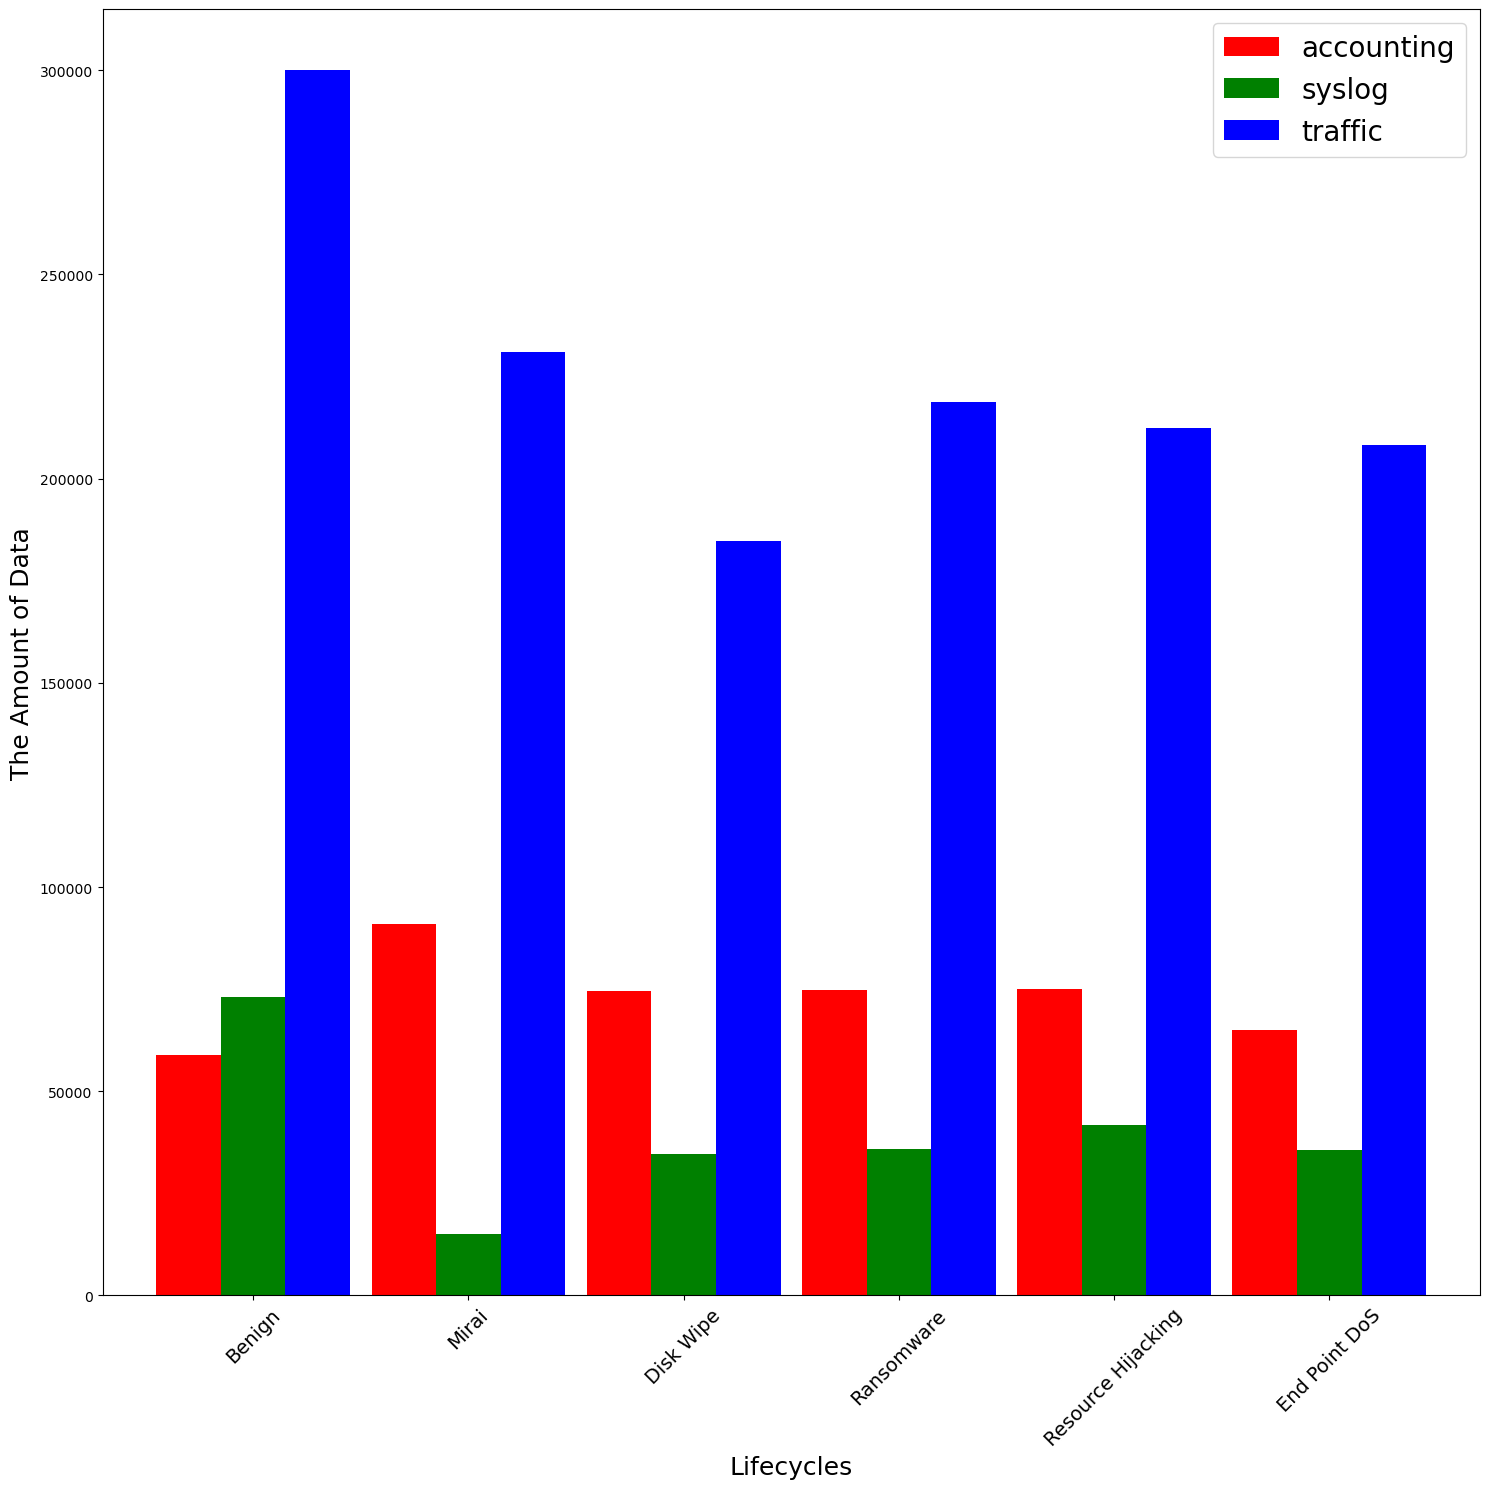

In [33]:
colors = ['red', 'green', 'blue']

axl = lifecycle_combined_count.plot(kind='bar', figsize=(15, 15), color=colors, width=0.9)
# plt.title('The Amount of Data', fontsize=14)
plt.ylabel('The Amount of Data', fontsize=18)
plt.xlabel('Lifecycles', fontsize=18)
# plt.xticks(rotation=0)
plt.legend(fontsize=20)
current_labels = [item.get_text() for item in axl.get_xticklabels()]
new_labels = [labels_lifecycle.get(int(label), label) for label in current_labels]

axl.set_xticklabels(new_labels, rotation=45, fontsize=14)
axt.tick_params(axis='y', labelsize=14)

plt.tight_layout()
plt.show()